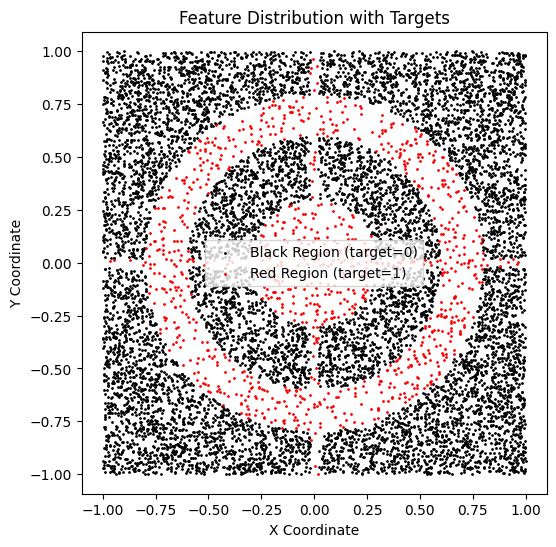

In [1]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('target_plot2/features.npy')
y = np.load('target_plot2/targets.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



In [5]:
import numpy as np

# 加载数据
black_data = np.load('target_plot2/black_region.npy')  # 黑色区域
red_data = np.load('target_plot2/red_region.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('target_plot2/features.npy', features)  # 保存打乱的特征数组
np.save('target_plot2/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[-0.37117737  0.10181595]
 [-0.39049859  0.81295222]
 [ 0.11081085  0.13660337]
 [ 0.84448387 -0.8796807 ]
 [-0.4296047   0.2088348 ]]
前5个标签： [0 0 1 0 0]


Begin to train.... - 2024-12-09 21:46:08,916 - DualGranularBalancedDeepForest
the shape of training samples: (11000, 2) - 2024-12-09 21:46:08,916 - DualGranularBalancedDeepForest
use f1_macro as training evaluation - 2024-12-09 21:46:08,917 - DualGranularBalancedDeepForest
stacking: True, save model: False - 2024-12-09 21:46:08,917 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-09 21:46:08,919 - DualGranularBalancedDeepForest
The shape of x_train is (11000, 2) - 2024-12-09 21:46:08,919 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9677, f1_score=0.9130, auc=0.9932, gmean=0.9642, sen=0.9600, spe=0.9685, aupr=0.9222 - 2024-12-09 21:46:14,751 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9705, f1_score=0.9194, auc=0.9945, gmean=0.9657, sen=0.9600, spe=0.9715, aupr=0.9339 - 2024-12-09 21:46:14,756 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9600, f1_score=0.8960, auc=0.9876, gmean=0.9622, sen=0.9650, spe=0.9595, aupr=0.9144 - 2024-12-09 21:46:14,761 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9618, f1_score=0.8976, auc=0.9915, gmean=0.9496, sen=0.9350, spe=0.9645, aupr=0.9501 - 2024-12-09 21:46:14,767 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9659, f1_score=0.9091, auc=0.9960, gmean=0.9655, sen=0.9650, spe=0.9660, aupr=0.9579 - 2024-12-09 21:46:14,772 - KFoldWrapper
layer_0, estimator_0

num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9655, f1_score=0.8941, auc=0.9832, gmean=0.8838, sen=0.7950, spe=0.9825, aupr=0.8876 - 2024-12-09 21:46:37,567 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9755, f1_score=0.9274, auc=0.9895, gmean=0.9358, sen=0.8900, spe=0.9840, aupr=0.9264 - 2024-12-09 21:46:37,572 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9673, f1_score=0.9010, auc=0.9756, gmean=0.8974, sen=0.8200, spe=0.9820, aupr=0.8576 - 2024-12-09 21:46:37,578 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9673, f1_score=0.9060, auc=0.9888, gmean=0.9268, sen=0.8800, spe=0.9760, aupr=0.9014 - 2024-12-09 21:46:37,583 - KFoldWrapper
layer_1, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9741, f1_score=0.9225, auc=0.9859, gmean=0.9255, sen=0.8700, spe=0.9845, aupr=0.9162 - 2024-12-09 21:46:37,589 - KFoldWrapper
layer_1, estimator_0

num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9795, f1_score=0.9374, auc=0.9837, gmean=0.9307, sen=0.8750, spe=0.9900, aupr=0.9439 - 2024-12-09 21:47:01,518 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9673, f1_score=0.9056, auc=0.9869, gmean=0.9244, sen=0.8750, spe=0.9765, aupr=0.8963 - 2024-12-09 21:47:01,523 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9736, f1_score=0.9213, auc=0.9815, gmean=0.9252, sen=0.8700, spe=0.9840, aupr=0.9164 - 2024-12-09 21:47:01,528 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9827, f1_score=0.9493, auc=0.9883, gmean=0.9632, sen=0.9400, spe=0.9870, aupr=0.9287 - 2024-12-09 21:47:01,534 - KFoldWrapper
layer_2, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9727, f1_score=0.9224, auc=0.9919, gmean=0.9486, sen=0.9200, spe=0.9780, aupr=0.9268 - 2024-12-09 21:47:01,538 - KFoldWrapper
layer_2, estimator_0

num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9786, f1_score=0.9340, auc=0.9833, gmean=0.9229, sen=0.8600, spe=0.9905, aupr=0.9352 - 2024-12-09 21:47:25,641 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9805, f1_score=0.9405, auc=0.9836, gmean=0.9360, sen=0.8850, spe=0.9900, aupr=0.9437 - 2024-12-09 21:47:25,646 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9841, f1_score=0.9515, auc=0.9911, gmean=0.9475, sen=0.9050, spe=0.9920, aupr=0.9513 - 2024-12-09 21:47:25,651 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9832, f1_score=0.9497, auc=0.9948, gmean=0.9541, sen=0.9200, spe=0.9895, aupr=0.9362 - 2024-12-09 21:47:25,656 - KFoldWrapper
layer_3, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9786, f1_score=0.9367, auc=0.9897, gmean=0.9446, sen=0.9050, spe=0.9860, aupr=0.9187 - 2024-12-09 21:47:25,660 - KFoldWrapper
layer_3, estimator_0

num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9786, f1_score=0.9343, auc=0.9903, gmean=0.9254, sen=0.8650, spe=0.9900, aupr=0.9396 - 2024-12-09 21:47:50,186 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9818, f1_score=0.9445, auc=0.9903, gmean=0.9391, sen=0.8900, spe=0.9910, aupr=0.9391 - 2024-12-09 21:47:50,191 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9827, f1_score=0.9478, auc=0.9902, gmean=0.9468, sen=0.9050, spe=0.9905, aupr=0.9466 - 2024-12-09 21:47:50,197 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9814, f1_score=0.9430, auc=0.9912, gmean=0.9365, sen=0.8850, spe=0.9910, aupr=0.9426 - 2024-12-09 21:47:50,202 - KFoldWrapper
layer_4, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9814, f1_score=0.9438, auc=0.9936, gmean=0.9437, sen=0.9000, spe=0.9895, aupr=0.9550 - 2024-12-09 21:47:50,206 - KFoldWrapper
layer_4, estimator_0

num_layers_before_append: 4
num_layers: 5
last_layer_index 4
UncertaintyAwareDeepForest - Accuracy: 0.9957


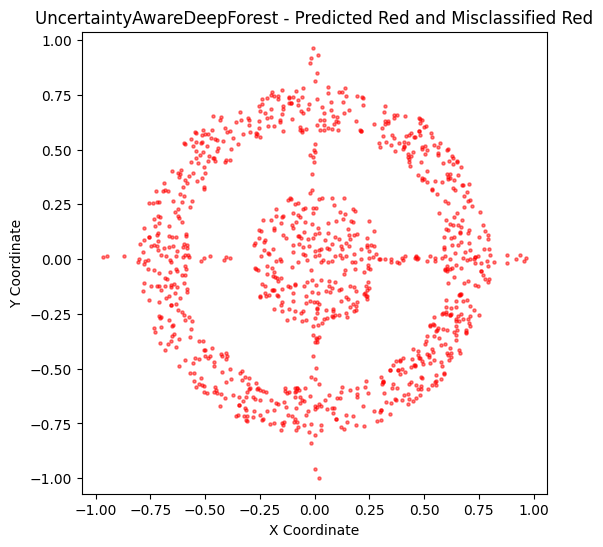

In [19]:
import os
# 配置输出文件夹
output_dir = "target_plot2"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training BalanceCascade...
BalanceCascade - Accuracy: 0.9975
Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 0.9999
Training UnderBagging...
UnderBagging - Accuracy: 0.9806
Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.6470
Training RUSBoost...
RUSBoost - Accuracy: 0.7779
Training BalancedRandomForest...
BalancedRandomForest - Accuracy: 0.9625
Training AdaCost...
AdaCost - Accuracy: 0.5898
Training AdaUBoost...
AdaUBoost - Accuracy: 0.6667
Training AsymBoost...
AsymBoost - Accuracy: 0.9033


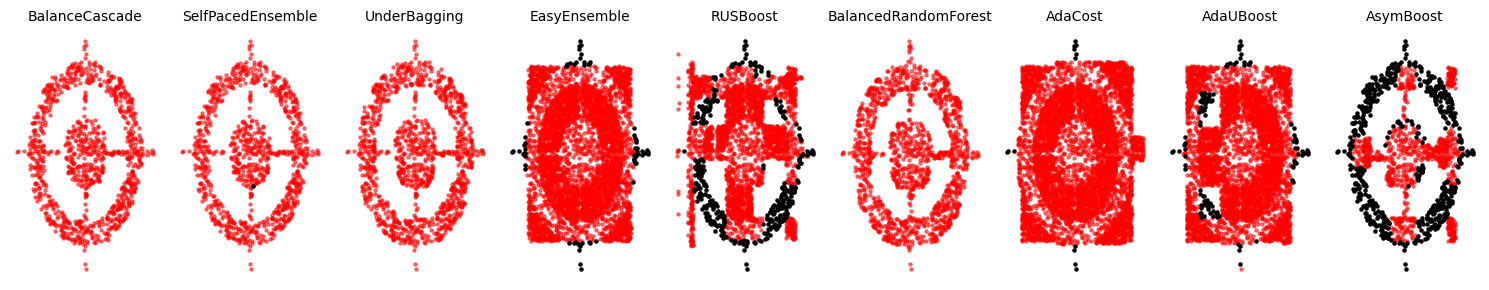

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os

# 配置输出文件夹
output_dir = "target_plot2"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50)
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9999
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.6672
Training OverBoost...
OverBoost - Accuracy: 0.6595
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7450
Training SMOTEBagging...
SMOTEBagging - Accuracy: 0.9999


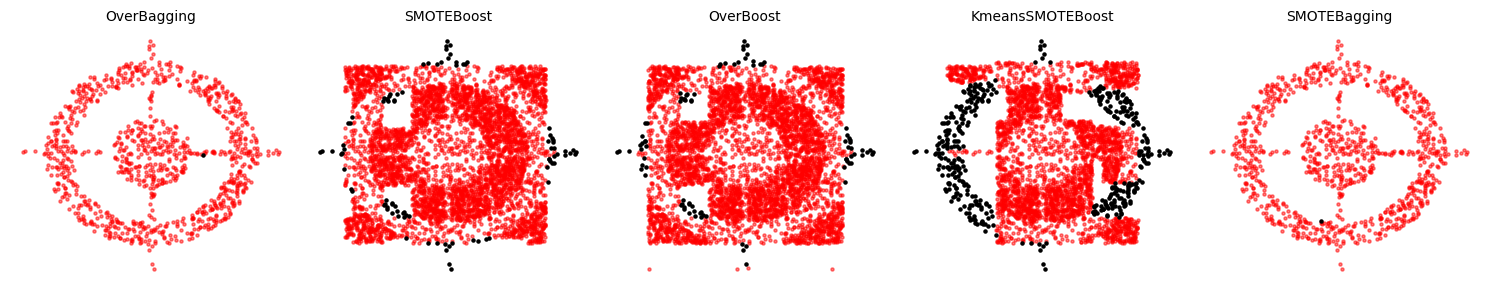

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "target_plot2"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    
    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()


数据保存完成，保存路径：show_sampling_diversity
X_original.npy：原始数据集的特征
y_original.npy：原始数据集的标签
target_sample.npy：目标少数类样本坐标
